# Preliminaries

In [1]:
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt

In [2]:
results_dir = "../outputs/"

# Prepare data

## Utils

In [22]:
def divide_results_by_dataset(results_dir, file="all_results.csv"):
    """Divide csv results into multiple files distinguished by dataset and if strategy is FLANDERS or not (e.g., all_results_mnist_flanders and all_results_mnist_no_flanders)."""
    results = pd.read_csv(results_dir + file, float_precision='round_trip')
    datasets = natsorted(results["dataset_name"].unique())
    for dataset in datasets:
        flanders = results[(results["dataset_name"] == dataset) & (results["strategy"] == "flanders")]
        no_flanders = results[(results["dataset_name"] == dataset) & (results["strategy"] != "flanders")]
        flanders.to_csv(results_dir + "all_results_" + dataset + "_flanders.csv", index=False)
        no_flanders.to_csv(results_dir + "all_results_" + dataset + "_no_flanders.csv", index=False)
    

In [4]:
def print_unique_data(results_df):
  for col in ["attack_fn", "num_malicious", "dataset_name", "strategy", "aggregate_fn"]:
    print(f"Unique values in {col}: {results_df[col].unique()}")

In [5]:
def translate_cols(df, attack_dict, dataset_dict, strategy_dict, aggregate_dict):
  column_names = ["attack_fn", "dataset_name", "strategy", "aggregate_fn"]
  for idx, d in enumerate([attack_dict, dataset_dict, strategy_dict, aggregate_dict]):
    df[column_names[idx]] = df[column_names[idx]].replace(d)
  return df

In [6]:
attack_dict = {
    "gaussian": "GAUSS",
    "lie": "LIE",
    "fang": "OPT",
    "minmax": "AGR-MM",
    "adaptive": "MAR-ATK"
}

dataset_dict = {
    "mnist": "MNIST",
    "fmnist": "FMNIST",
    "cifar": "CIFAR-10",
    "cifar100": "CIFAR-100"
}

strategy_dict = {
    "flanders": "FLANDERS",
    "fedavg": "FedAvg",
    "fedmedian": "FedMedian",
    "trimmedmean": "TrimmedMean",
    "bulyan": "Bulyan",
    "krum": "MultiKrum",
    "fldetector": "FLDetector"
}

aggregate_dict = {
    "flwr.server.strategy.aggregate.aggregate": "FedAvg",
    "flwr.server.strategy.aggregate.aggregate_median": "FedMedian",
    "flwr.server.strategy.aggregate.aggregate_trimmed_avg": "TrimmedMean",
    "flwr.server.strategy.aggregate.aggregate_bulyan": "Bulyan",
    "flwr.server.strategy.aggregate.aggregate_krum": "MultiKrum"
}

In [19]:
divide_results_by_dataset(results_dir)

In [21]:
!diff ../outputs/all_results_mnist_flanders.csv ../outputs/original/all_results_mnist_flanders.csv

9c9
< 7,470.618819475174,0.6119,0.7851549625155109,0,500,0,0,gaussian,mnist,0,flanders,flwr.server.strategy.aggregate.aggregate
---
> 7,470.61881947517395,0.6119,0.7851549625155109,0,500,0,0,gaussian,mnist,0,flanders,flwr.server.strategy.aggregate.aggregate
11c11
< 9,438.1458781957626,0.6336,0.7974040672284071,0,700,0,0,gaussian,mnist,0,flanders,flwr.server.strategy.aggregate.aggregate
---
> 9,438.14587819576263,0.6336,0.7974040672284071,0,700,0,0,gaussian,mnist,0,flanders,flwr.server.strategy.aggregate.aggregate
20c20
< 18,351.819709956646,0.6916,0.8299584002973285,0,1600,0,0,gaussian,mnist,0,flanders,flwr.server.strategy.aggregate.aggregate
---
> 18,351.81970995664597,0.6916,0.8299584002973285,0,1600,0,0,gaussian,mnist,0,flanders,flwr.server.strategy.aggregate.aggregate
30c30
< 28,295.372104883194,0.7451,0.8597614104143163,0,2600,0,0,gaussian,mnist,0,flanders,flwr.server.strategy.aggregate.aggregate
---
> 28,295.37210488319397,0.7451,0.8597614104143163,0,2600,0,0,gaussian,mnist,0,fla

## MNIST

### Use this shortcut

In [7]:
# CSV pre-processing MNIST
results_flanders_file = results_dir + "all_results_mnist_flanders.csv"
results_no_flanders_file = results_dir + "all_results_mnist_no_flanders.csv"
results_flanders_df = pd.read_csv(results_flanders_file)
results_no_flanders_df = pd.read_csv(results_no_flanders_file)
results_flanders_df = translate_cols(results_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)
results_no_flanders_df = translate_cols(results_no_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)
mnist_df = pd.concat([results_flanders_df, results_no_flanders_df])
mnist_df

,round,loss,accuracy,auc,TP,TN,FP,FN,attack_fn,dataset_name,num_malicious,strategy,aggregate_fn
0,0,720.833121,0.1045,0.503422,0,0,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
1,1,664.522252,0.2089,0.563116,0,0,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
2,2,624.633826,0.3560,0.644731,0,0,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
3,3,581.476472,0.4773,0.710941,0,100,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
4,4,545.114205,0.5430,0.746970,0,200,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,46,724.281725,0.1025,0.500479,0,0,0,0,AGR-MM,MNIST,80,dnc,FedAvg
3566,47,724.350138,0.1024,0.500421,0,0,0,0,AGR-MM,MNIST,80,dnc,FedAvg
3567,48,724.535263,0.1025,0.500479,0,0,0,0,AGR-MM,MNIST,80,dnc,FedAvg
3568,49,724.588881,0.1028,0.500598,0,0,0,0,AGR-MM,MNIST,80,dnc,FedAvg


In [7]:
print_unique_data(mnist_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['MNIST']
Unique values in strategy: ['FLANDERS' 'FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan' 'dnc']
Unique values in aggregate_fn: ['FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan'
 'flanders.strategies.aggregate.aggregate_dnc']


### Step-by-step processing

In [ ]:
results_flanders_file = results_dir + "all_results_mnist_flanders.csv"
results_no_flanders_file = results_dir + "all_results_mnist_no_flanders.csv"

In [ ]:
results_flanders_df = pd.read_csv(results_flanders_file)
results_no_flanders_df = pd.read_csv(results_no_flanders_file)

In [ ]:
print_unique_data(results_flanders_df)

Unique values in attack_fn: ['gaussian' 'lie' 'fang' 'minmax']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['mnist']
Unique values in strategy: ['flanders']
Unique values in aggregate_fn: ['flwr.server.strategy.aggregate.aggregate'
 'flwr.server.strategy.aggregate.aggregate_trimmed_avg'
 'flwr.server.strategy.aggregate.aggregate_median'
 'flwr.server.strategy.aggregate.aggregate_bulyan'
 'flanders.strategies.aggregate.aggregate_dnc'
 'flwr.server.strategy.aggregate.aggregate_krum']


In [ ]:
print_unique_data(results_no_flanders_df)

Unique values in attack_fn: ['gaussian' 'lie' 'fang' 'minmax']
Unique values in num_malicious: [ 0 20 40 60 80]
Unique values in dataset_name: ['mnist']
Unique values in strategy: ['fedavg' 'trimmedmean' 'fedmedian' 'bulyan' 'dnc' 'krum']
Unique values in aggregate_fn: ['flwr.server.strategy.aggregate.aggregate']


Translate strings

In [ ]:
results_flanders_df = translate_cols(results_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)

In [ ]:
results_no_flanders_df = translate_cols(results_no_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)

In [ ]:
print_unique_data(results_flanders_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['MNIST']
Unique values in strategy: ['FLANDERS']
Unique values in aggregate_fn: ['FedAvg' 'TrimmedMean' 'FedMedian' 'Bulyan' 'DnC' 'MultiKrum']


In [ ]:
print_unique_data(results_no_flanders_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 40 60 80]
Unique values in dataset_name: ['MNIST']
Unique values in strategy: ['FedAvg' 'TrimmedMean' 'FedMedian' 'Bulyan' 'DnC' 'MultiKrum']
Unique values in aggregate_fn: ['FedAvg']


Concatenate the 2 dataframes, namely FLANDERS+f and baselines:

In [ ]:
mnist_df = pd.concat([results_flanders_df, results_no_flanders_df])

In [ ]:
mnist_df

,round,loss,accuracy,auc,TP,TN,FP,FN,attack_fn,dataset_name,num_malicious,strategy,aggregate_fn
0,0,720.277098,0.1085,0.504867,0,0,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
1,1,675.050940,0.4548,0.699483,0,0,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
2,2,647.636643,0.5211,0.735845,0,0,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
3,3,614.434795,0.5695,0.761650,0,100,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
4,4,584.168507,0.6069,0.781741,0,200,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,46,292.811745,0.7496,0.861295,0,0,0,0,AGR-MM,MNIST,20,MultiKrum,FedAvg
3974,47,289.781884,0.7592,0.866885,0,0,0,0,AGR-MM,MNIST,20,MultiKrum,FedAvg
3975,48,287.874436,0.7608,0.867952,0,0,0,0,AGR-MM,MNIST,20,MultiKrum,FedAvg
3976,49,288.832778,0.7496,0.861578,0,0,0,0,AGR-MM,MNIST,20,MultiKrum,FedAvg


In [ ]:
print_unique_data(mnist_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 60 80 40]
Unique values in dataset_name: ['MNIST']
Unique values in strategy: ['FLANDERS' 'FedAvg' 'TrimmedMean' 'FedMedian' 'Bulyan' 'DnC' 'MultiKrum']
Unique values in aggregate_fn: ['FedAvg' 'TrimmedMean' 'FedMedian' 'Bulyan' 'DnC' 'MultiKrum']


## Fashion MNIST

### Use this shortcut

In [8]:
# CSV pre-processing FMNIST
results_flanders_file = results_dir + "all_results_fmnist_flanders.csv"
results_no_flanders_file = results_dir + "all_results_fmnist_no_flanders.csv"
results_flanders_df = pd.read_csv(results_flanders_file)
results_no_flanders_df = pd.read_csv(results_no_flanders_file)
results_flanders_df = translate_cols(results_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)
results_no_flanders_df = translate_cols(results_no_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)
fmnist_df = pd.concat([results_flanders_df, results_no_flanders_df])
fmnist_df

,round,loss,accuracy,auc,TP,TN,FP,FN,attack_fn,dataset_name,num_malicious,strategy,aggregate_fn
0,0,23082.333813,0.0631,0.479500,0,0,0,0,GAUSS,FMNIST,0,FLANDERS,FedAvg
1,1,21920.131561,0.1977,0.554278,0,0,0,0,GAUSS,FMNIST,0,FLANDERS,FedAvg
2,2,17859.096020,0.4210,0.678333,0,0,0,0,GAUSS,FMNIST,0,FLANDERS,FedAvg
3,3,15559.044926,0.4920,0.717778,0,100,0,0,GAUSS,FMNIST,0,FLANDERS,FedAvg
4,4,14684.193722,0.5001,0.722278,0,200,0,0,GAUSS,FMNIST,0,FLANDERS,FedAvg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,46,23279.564907,0.1000,0.500000,0,0,0,0,AGR-MM,FMNIST,80,dnc,FedAvg
3566,47,23290.980442,0.1000,0.500000,0,0,0,0,AGR-MM,FMNIST,80,dnc,FedAvg
3567,48,23302.251022,0.1000,0.500000,0,0,0,0,AGR-MM,FMNIST,80,dnc,FedAvg
3568,49,23312.512596,0.1000,0.500000,0,0,0,0,AGR-MM,FMNIST,80,dnc,FedAvg


In [9]:
print_unique_data(fmnist_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['FMNIST']
Unique values in strategy: ['FLANDERS' 'FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan' 'dnc']
Unique values in aggregate_fn: ['FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan']


### Step-by-step processing

In [ ]:
results_flanders_file = results_dir + "all_results_fmnist_flanders.csv"
results_no_flanders_file = results_dir + "all_results_fmnist_no_flanders.csv"

In [ ]:
results_flanders_df = pd.read_csv(results_flanders_file)
results_no_flanders_df = pd.read_csv(results_no_flanders_file)

In [ ]:
print_unique_data(results_flanders_df)

Unique values in attack_fn: ['gaussian' 'lie' 'fang' 'minmax']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['fmnist']
Unique values in strategy: ['flanders']
Unique values in aggregate_fn: ['flwr.server.strategy.aggregate.aggregate'
 'flwr.server.strategy.aggregate.aggregate_trimmed_avg'
 'flwr.server.strategy.aggregate.aggregate_median'
 'flwr.server.strategy.aggregate.aggregate_krum'
 'flwr.server.strategy.aggregate.aggregate_bulyan'
 'flanders.strategies.aggregate.aggregate_dnc']


In [ ]:
print_unique_data(results_no_flanders_df)

Unique values in attack_fn: ['gaussian' 'lie' 'fang' 'minmax']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['fmnist']
Unique values in strategy: ['fedavg' 'trimmedmean' 'fedmedian' 'krum' 'bulyan' 'dnc']
Unique values in aggregate_fn: ['flwr.server.strategy.aggregate.aggregate']


Translate strings

In [ ]:
results_flanders_df = translate_cols(results_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)

In [ ]:
results_no_flanders_df = translate_cols(results_no_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)

In [ ]:
print_unique_data(results_flanders_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['fmnist']
Unique values in strategy: ['FLANDERS']
Unique values in aggregate_fn: ['FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan' 'DnC']


In [ ]:
print_unique_data(results_no_flanders_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['fmnist']
Unique values in strategy: ['FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan' 'DnC']
Unique values in aggregate_fn: ['FedAvg']


Concatenate the 2 dataframes, namely FLANDERS+f and baselines:

In [ ]:
fmnist_df = pd.concat([results_flanders_df, results_no_flanders_df])

In [ ]:
fmnist_df

,round,loss,accuracy,auc,TP,TN,FP,FN,attack_fn,dataset_name,num_malicious,strategy,aggregate_fn
0,0,722.573335,0.0960,0.497778,0,0,0,0,GAUSS,fmnist,0,FLANDERS,FedAvg
1,1,679.164587,0.2219,0.567722,0,0,0,0,GAUSS,fmnist,0,FLANDERS,FedAvg
2,2,559.450005,0.4582,0.699000,0,0,0,0,GAUSS,fmnist,0,FLANDERS,FedAvg
3,3,473.043367,0.5389,0.743833,0,100,0,0,GAUSS,fmnist,0,FLANDERS,FedAvg
4,4,438.435710,0.5686,0.760333,0,200,0,0,GAUSS,fmnist,0,FLANDERS,FedAvg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,46,729.786036,0.1000,0.500000,0,0,0,0,AGR-MM,fmnist,80,DnC,FedAvg
3566,47,730.091794,0.1000,0.500000,0,0,0,0,AGR-MM,fmnist,80,DnC,FedAvg
3567,48,730.424492,0.1000,0.500000,0,0,0,0,AGR-MM,fmnist,80,DnC,FedAvg
3568,49,730.710982,0.1000,0.500000,0,0,0,0,AGR-MM,fmnist,80,DnC,FedAvg


In [ ]:
print_unique_data(fmnist_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['fmnist']
Unique values in strategy: ['FLANDERS' 'FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan' 'DnC']
Unique values in aggregate_fn: ['FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan' 'DnC']


In [20]:
# CSV pre-processing CIFAR-10
results_flanders_file = results_dir + "all_results_cifar_flanders.csv"
results_no_flanders_file = results_dir + "all_results_cifar_no_flanders.csv"
results_flanders_df = pd.read_csv(results_flanders_file)
results_no_flanders_df = pd.read_csv(results_no_flanders_file)
results_flanders_df = translate_cols(results_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)
results_no_flanders_df = translate_cols(results_no_flanders_df, attack_dict ,dataset_dict, strategy_dict, aggregate_dict)
cifar_df = pd.concat([results_flanders_df, results_no_flanders_df])
cifar_df

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/all_results_cifar_flanders.csv'

In [ ]:
print_unique_data(cifar_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 60 80 40]
Unique values in dataset_name: ['CIFAR-10']
Unique values in strategy: ['FLANDERS' 'FedAvg' 'TrimmedMean' 'FedMedian' 'DnC' 'MultiKrum' 'Bulyan'
 'FLDetector']
Unique values in aggregate_fn: ['FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan' 'DnC']


## Unify datasets

In [9]:
all_datasets_df = pd.concat([mnist_df, fmnist_df])

In [10]:
all_datasets_df

,round,loss,accuracy,auc,TP,TN,FP,FN,attack_fn,dataset_name,num_malicious,strategy,aggregate_fn
0,0,720.833121,0.1045,0.503422,0,0,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
1,1,664.522252,0.2089,0.563116,0,0,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
2,2,624.633826,0.3560,0.644731,0,0,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
3,3,581.476472,0.4773,0.710941,0,100,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
4,4,545.114205,0.5430,0.746970,0,200,0,0,GAUSS,MNIST,0,FLANDERS,FedAvg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,46,23279.564907,0.1000,0.500000,0,0,0,0,AGR-MM,FMNIST,80,dnc,FedAvg
3566,47,23290.980442,0.1000,0.500000,0,0,0,0,AGR-MM,FMNIST,80,dnc,FedAvg
3567,48,23302.251022,0.1000,0.500000,0,0,0,0,AGR-MM,FMNIST,80,dnc,FedAvg
3568,49,23312.512596,0.1000,0.500000,0,0,0,0,AGR-MM,FMNIST,80,dnc,FedAvg


In [11]:
print_unique_data(all_datasets_df)

Unique values in attack_fn: ['GAUSS' 'LIE' 'OPT' 'AGR-MM']
Unique values in num_malicious: [ 0 20 60 80]
Unique values in dataset_name: ['MNIST' 'FMNIST']
Unique values in strategy: ['FLANDERS' 'FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan' 'dnc']
Unique values in aggregate_fn: ['FedAvg' 'TrimmedMean' 'FedMedian' 'MultiKrum' 'Bulyan'
 'flanders.strategies.aggregate.aggregate_dnc']


# Tables


## Accuracy

### Best with improvment w.r.t. baseline

In [26]:
def accuracy_table(input_df, b):
  # Define strategies and attacks
  strategies = ['FedAvg', 'FLANDERS + FedAvg', 'FedMedian', 'FLANDERS + FedMedian', 'TrimmedMean', 'FLANDERS + TrimmedMean', 'MultiKrum', 'FLANDERS + MultiKrum', 'Bulyan', 'FLANDERS + Bulyan']
  attacks = ['GAUSS', 'LIE', 'OPT', 'AGR-MM']
  dataset_names = ["MNIST", "FMNIST"]

  # Create MultiIndex for the columns
  columns = pd.MultiIndex.from_product([dataset_names, attacks], names=['Dataset', 'Attack'])

  # Create an empty DataFrame with the defined columns and strategies
  df = pd.DataFrame(index=strategies, columns=columns)

  filtered_df = input_df[(input_df['num_malicious'] == b) & (input_df['round'] >= 3)]
  baseline_df = filtered_df[filtered_df['strategy'] != 'FLANDERS']
  flanders_df = filtered_df[filtered_df['strategy'] == 'FLANDERS']

  # Populate the DataFrame
  for strategy in ['FedAvg', 'TrimmedMean', 'FedMedian', 'MultiKrum', 'Bulyan']:
    for dataset in dataset_names:
      for attack in attacks:
        df.loc[strategy, (dataset, attack)] = round(baseline_df[(baseline_df['strategy']==strategy) & (baseline_df['attack_fn']==attack) & (baseline_df['dataset_name']==dataset)]['accuracy'].max(), 2)
        df.loc[f"FLANDERS + {strategy}", (dataset, attack)] = round(flanders_df[(flanders_df['aggregate_fn']==strategy) & (flanders_df['attack_fn']==attack) & (flanders_df['dataset_name']==dataset)]['accuracy'].max(), 2)

  return df


In [34]:
# Table 19
acc_0 = accuracy_table(all_datasets_df, 0).dropna(axis=1, how='all')
acc_0

Dataset,MNIST,FMNIST
Attack,GAUSS,GAUSS
FedAvg,0.86,0.68
FLANDERS + FedAvg,0.84,0.64
FedMedian,0.83,0.71
FLANDERS + FedMedian,0.76,0.73
TrimmedMean,0.85,0.69
FLANDERS + TrimmedMean,0.78,0.7
MultiKrum,0.68,0.66
FLANDERS + MultiKrum,0.74,0.73
Bulyan,0.86,0.62


In [31]:
# Table 15
acc_20 = accuracy_table(all_datasets_df, 20)
acc_20

Dataset                MNIST                    FMNIST                   
Attack                 GAUSS   LIE   OPT AGR-MM  GAUSS   LIE   OPT AGR-MM
FedAvg                   0.2  0.17  0.67   0.45   0.25  0.17  0.57   0.11
FLANDERS + FedAvg       0.88  0.87  0.48   0.88   0.66  0.67  0.57   0.64
FedMedian                0.8  0.66  0.79   0.59   0.66  0.65  0.67    0.6
FLANDERS + FedMedian    0.85  0.85  0.66   0.83   0.71  0.69  0.63   0.73
TrimmedMean             0.86  0.52  0.73   0.61   0.69  0.54  0.62   0.58
FLANDERS + TrimmedMean  0.81  0.85  0.78   0.83   0.69   0.7  0.63   0.73
MultiKrum               0.78  0.77  0.81   0.82   0.74  0.65   0.7   0.67
FLANDERS + MultiKrum    0.82  0.86  0.84   0.82   0.73   0.7  0.73   0.71
Bulyan                  0.82  0.84  0.84   0.83   0.71  0.72  0.69   0.76
FLANDERS + Bulyan        0.9  0.84  0.79   0.85   0.65  0.65  0.66   0.65

Bulyan is NaN because it cannot work when the number of malicious clients is > 25%

In [16]:
# Table 17
acc_60 = accuracy_table(all_datasets_df, 60)
acc_60

Dataset                MNIST                    FMNIST                   
Attack                 GAUSS   LIE   OPT AGR-MM  GAUSS   LIE   OPT AGR-MM
FedAvg                  0.19  0.15   0.2   0.16   0.28   0.1  0.19    0.1
FLANDERS + FedAvg       0.76  0.88  0.85   0.85   0.69  0.67  0.71   0.67
FedMedian                0.8  0.19  0.16   0.29   0.65   0.1   0.1    0.1
FLANDERS + FedMedian     0.8  0.86  0.83   0.86   0.71  0.69  0.71   0.71
TrimmedMean             0.25   0.2  0.33    0.1   0.33   0.1  0.17    0.1
FLANDERS + TrimmedMean  0.78  0.87  0.84   0.83    0.7  0.71  0.73   0.74
MultiKrum               0.79  0.14  0.22   0.15   0.71   0.1  0.12    0.1
FLANDERS + MultiKrum    0.88  0.88  0.86   0.78   0.72  0.71  0.73   0.69
Bulyan                   NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN
FLANDERS + Bulyan       0.89  0.87   0.9   0.85   0.68  0.64   0.6   0.69

In [17]:
# Table 3
acc_80 = accuracy_table(all_datasets_df, 80)
acc_80

Dataset                MNIST                    FMNIST                   
Attack                 GAUSS   LIE   OPT AGR-MM  GAUSS   LIE   OPT AGR-MM
FedAvg                  0.21  0.16  0.31   0.13   0.24   0.1  0.18    0.1
FLANDERS + FedAvg       0.85  0.86  0.88   0.85   0.69   0.7  0.69   0.66
FedMedian               0.34  0.17  0.14   0.09    0.3   0.1  0.14    0.1
FLANDERS + FedMedian    0.87  0.84   0.8    0.8   0.73  0.74  0.72   0.72
TrimmedMean             0.17  0.15  0.21   0.14   0.21   0.1  0.12    0.1
FLANDERS + TrimmedMean  0.81  0.85  0.81   0.82   0.74  0.73   0.7   0.69
MultiKrum               0.82  0.21  0.32   0.11   0.72   0.1  0.15    0.1
FLANDERS + MultiKrum    0.87  0.83  0.87   0.85   0.68  0.73  0.72    0.7
Bulyan                   NaN   NaN   NaN    NaN    NaN   NaN   NaN    NaN
FLANDERS + Bulyan       0.84  0.84  0.83    0.8   0.69  0.72  0.69   0.68

### Best w.r.t. number of attackers

In [18]:
def accuracy_table_attackers(input_df, aggregate_fn):
  # Define strategies and attacks
  attacks = ['GAUSS', 'LIE', 'OPT', 'AGR-MM']
  dataset_names = ["MNIST", "FMNIST"]
  num_malicious = [0, 20, 60, 80]

  # Create MultiIndex for the columns
  columns = pd.MultiIndex.from_product([dataset_names, num_malicious], names=['Dataset', '# Malicious'])

  #######
  #columns = pd.MultiIndex.from_product([['MNIST', 'CIFAR-10'], ['GAUSS', 'LIE', 'OPT', 'AGR-MM'], ['LAST', 'BEST']])
  #######


  # Create an empty DataFrame with the defined columns and strategies
  df = pd.DataFrame(index=attacks, columns=columns)

  filtered_df = input_df[(input_df['aggregate_fn'] == aggregate_fn) & (input_df['round'] >= 3)]
  baseline_df = filtered_df[filtered_df['strategy'] != 'FLANDERS']
  flanders_df = filtered_df[filtered_df['strategy'] == 'FLANDERS']

  # Populate the DataFrame
  for dataset in dataset_names:
    for attack in attacks:
      for b in num_malicious:
        if b == 0:
          df.loc[attack, (dataset, b)] = round(flanders_df[(flanders_df['num_malicious']==b) & (flanders_df['attack_fn']=='GAUSS') & (flanders_df['dataset_name']==dataset)]['accuracy'].max(), 2)
        else:
          df.loc[attack, (dataset, b)] = round(flanders_df[(flanders_df['num_malicious']==b) & (flanders_df['attack_fn']==attack) & (flanders_df['dataset_name']==dataset)]['accuracy'].max(), 2)

  return df

In [19]:
# Table 20
acc_att = accuracy_table_attackers(all_datasets_df, 'MultiKrum')
acc_att

Dataset     MNIST                   FMNIST                  
# Malicious    0     20    60    80     0     20    60    80
GAUSS        0.74  0.82  0.88  0.87   0.73  0.73  0.72  0.68
LIE          0.74  0.86  0.88  0.83   0.73   0.7  0.71  0.73
OPT          0.74  0.84  0.86  0.87   0.73  0.73  0.73  0.72
AGR-MM       0.74  0.82  0.78  0.85   0.73  0.71  0.69   0.7

## Precision and Recall

In [20]:
def pr_table(input_df, b):
  strategies = ['FLANDERS']
  attacks = ['GAUSS', 'LIE', 'OPT', 'AGR-MM']
  dataset_names = ["MNIST", "FMNIST"]

  # Create MultiIndex for the columns
  columns = pd.MultiIndex.from_product([strategies, attacks, ['P', 'R']], names=['Strategy', 'Attack', 'P/R'])

  # Create an empty DataFrame with the defined columns and strategies
  df = pd.DataFrame(index=dataset_names, columns=columns)

  filtered_df = input_df[(input_df['num_malicious'] == b) & (input_df['round'] == 50) & (input_df['aggregate_fn']=='FedAvg')]
  flanders_df = filtered_df[filtered_df['strategy'] == 'FLANDERS']
  strat_dfs = [flanders_df]

  # Populate the DataFrame
  for dataset in dataset_names:
    for attack in attacks:
      for idx, strategy in enumerate(strategies):
        tp = strat_dfs[idx][(strat_dfs[idx]['attack_fn']==attack) & (strat_dfs[idx]['dataset_name']==dataset)]['TP'].iloc[0]
        fp = strat_dfs[idx][(strat_dfs[idx]['attack_fn']==attack) & (strat_dfs[idx]['dataset_name']==dataset)]['FP'].iloc[0]
        fn = strat_dfs[idx][(strat_dfs[idx]['attack_fn']==attack) & (strat_dfs[idx]['dataset_name']==dataset)]['FN'].iloc[0]
        df.loc[dataset, (strategy, attack, 'P')] = round(tp / (tp+fp), 2)
        df.loc[dataset, (strategy, attack, 'R')] = round(tp / (tp+fn), 2)

  return df

In [21]:
# Table 1
pr_20 = pr_table(all_datasets_df, 20)
pr_20

Strategy FLANDERS                                       
Attack      GAUSS       LIE        OPT       AGR-MM     
P/R             P    R    P    R     P     R      P    R
MNIST         1.0  1.0  1.0  1.0  0.15  0.15    1.0  1.0
FMNIST        1.0  1.0  1.0  1.0  0.16  0.16    1.0  1.0

In [22]:
# Table 2
pr_60 = pr_table(all_datasets_df, 60)
pr_60

Strategy FLANDERS                                     
Attack      GAUSS       LIE       OPT      AGR-MM     
P/R             P    R    P    R    P    R      P    R
MNIST         1.0  1.0  1.0  1.0  1.0  1.0    1.0  1.0
FMNIST        1.0  1.0  1.0  1.0  1.0  1.0    1.0  1.0

In [23]:
# Table 3
pr_80 = pr_table(all_datasets_df, 80)
pr_80

Strategy FLANDERS                                     
Attack      GAUSS       LIE       OPT      AGR-MM     
P/R             P    R    P    R    P    R      P    R
MNIST         1.0  1.0  1.0  1.0  1.0  1.0    1.0  1.0
FMNIST        1.0  1.0  1.0  1.0  1.0  1.0    1.0  1.0

# Plots

## Accuracy over rounds

In [24]:
df_mnist_acc_flanders = all_datasets_df[(all_datasets_df['strategy']=='FLANDERS') & (all_datasets_df['num_malicious']==80) & (all_datasets_df['dataset_name']=='MNIST') & (all_datasets_df['aggregate_fn']=='MultiKrum')]
df_mnist_acc_fedavg = all_datasets_df[(all_datasets_df['strategy']=='FedAvg') & (all_datasets_df['num_malicious']==80) & (all_datasets_df['dataset_name']=='MNIST')]
df_no_attack = all_datasets_df[(all_datasets_df['strategy']=='FedAvg') & (all_datasets_df['num_malicious']==0) & (all_datasets_df['dataset_name']=='MNIST')]

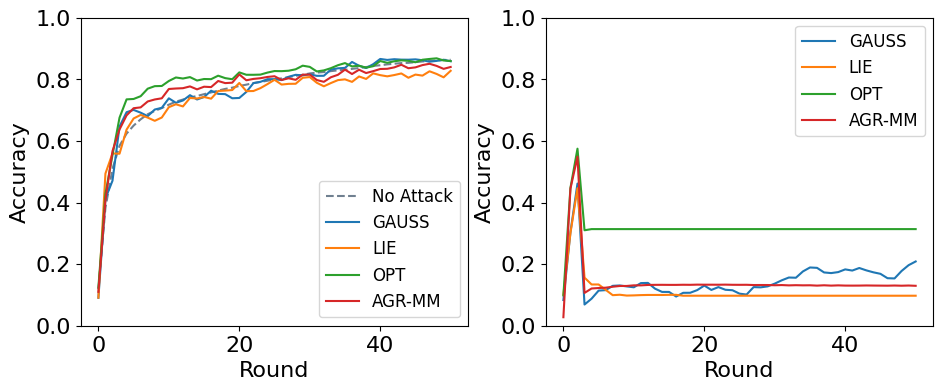

In [25]:
# Figure 3
num_plots = 2
plt.style.use('default')
fig, axs = plt.subplots(1, num_plots, figsize=(11, 4))

data = [df_mnist_acc_flanders, df_mnist_acc_fedavg]

for i in range(num_plots):
  if i == 0:
    acc = df_no_attack[df_no_attack["attack_fn"]=='GAUSS']['accuracy'].to_list()
    axs[i].plot(acc, label="No Attack", linestyle='--', color='slategray')
  for attack in ['GAUSS', 'LIE', 'OPT', 'AGR-MM']:
    acc = data[i][data[i]['attack_fn']==attack]['accuracy'].to_list()
    x = [i for i in range(len(data))]
    axs[i].plot(acc, label=attack)
    axs[i].set_ylim((0,1.0))
    axs[i].set_xlabel('Round', fontsize=16)
    axs[i].set_ylabel('Accuracy', fontsize=16)
    axs[i].legend(prop={'size': 12})
    axs[i].tick_params(axis='both', which='major', labelsize=16)
    axs[i].tick_params(axis='both', which='minor', labelsize=16)

plt.show()